## Step 1: Answering the question

[[ go back to the top ]](#Table-of-contents)

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to classify the species (i.e., class) of the flower based on four measurements that we're provided: sepal length, sepal width, petal length, and petal width.

>Did you define the metric for success before beginning?

Let's do that now. Since we're performing classification, we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) — the fraction of correctly classified flowers — to quantify how well our model is performing. Our company's Head of Data has told us that we should achieve at least 90% accuracy.

>Did you understand the context for the question and the scientific or business application?

We're building part of a data analysis pipeline for a smartphone app that will be able to classify the species of flowers from pictures taken on the smartphone. In the future, this pipeline will be connected to another pipeline that automatically measures from pictures the traits we're using to perform this classification.

>Did you record the experimental design?

Our company's Head of Data has told us that the field researchers are hand-measuring 50 randomly-sampled flowers of each species using a standardized methodology. The field researchers take pictures of each flower they sample from pre-defined angles so the measurements and species can be confirmed by the other field researchers at a later point. At the end of each day, the data is compiled and stored on a private company GitHub repository.

>Did you consider whether the question could be answered with the available data?

The data set we currently have is only for three types of *Iris* flowers. The model built off of this data set will only work for those *Iris* flowers, so we will need more data to create a general flower classifier.

<hr />

Notice that we've spent a fair amount of time working on the problem without writing a line of code or even looking at the data.

**Thinking about and documenting the problem we're working on is an important step to performing effective data analysis that often goes overlooked.** Don't skip it.

## Step 2: Checking the data

[[ go back to the top ]](#Table-of-contents)

The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [18]:
import pandas as pd
iris_data = pd.read_csv('/home/jakey/github/Data-Analysis-and-Machine-Learning-Projects/example-data-science-notebook/iris-data.csv')
iris_data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


We're in luck! The data seems to be in a usable format.

The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents. The headers even give us the units that the measurements were recorded in, just in case we needed to know at a later point in the project.

Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flower.

**One of the first things we should look for is missing data.** Thankfully, the field researchers already told us that they put a 'NA' into the spreadsheet when they were missing a measurement.

We can tell pandas to automatically identify missing values if it knows our missing value marker.

In [19]:
iris_data = pd.read_csv('/home/jakey/github/Data-Analysis-and-Machine-Learning-Projects/example-data-science-notebook/iris-data.csv',na_values=['NA'])
iris_data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Next, let's create a scatterplot matrix. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

/home/jakey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/jakey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


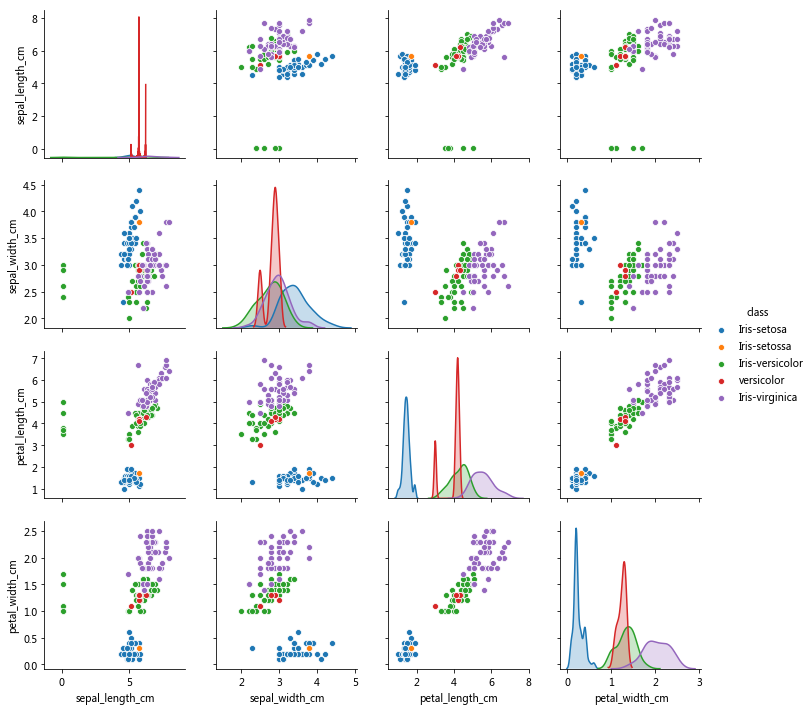

In [22]:
# Plot pairwise relationships in a dataset.
# By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.
# It is also possible to show a subset of variables or plot different variables on the rows and columns.
# This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility.
sns.pairplot(iris_data.dropna(),hue='class')

From the scatterplot matrix, we can already see some issues with the data set:

1. There are five classes when there should only be three, meaning there were some coding errors.

2. There are some clear outliers in the measurements that may be erroneous: one `sepal_width_cm` entry for `Iris-setosa` falls well outside its normal range, and several `sepal_length_cm` entries for `Iris-versicolor` are near-zero for some reason.

3. We had to drop those rows with missing values.

In all of these cases, we need to figure out what to do with the erroneous data. Which takes us to the next step...

## Step 3: Tidying the data

[[ go back to the top ]](#Table-of-contents)

Now that we've identified several errors in the data set, we need to fix them before we proceed with the analysis.

Let's walk through the issues one-by-one.

>There are five classes when there should only be three, meaning there were some coding errors.

After talking with the field researchers, it sounds like one of them forgot to add `Iris-` before their `Iris-versicolor` entries. The other extraneous class, `Iris-setossa`, was simply a typo that they forgot to fix.

Let's use the DataFrame to fix these errors.

In [23]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Much better! Now we only have three class types. Imagine how embarrassing it would've been to create a model that used the wrong classes.

>There are some clear outliers in the measurements that may be erroneous: one `sepal_width_cm` entry for `Iris-setosa` falls well outside its normal range, and several `sepal_length_cm` entries for `Iris-versicolor` are near-zero for some reason.

Fixing outliers can be tricky business. It's rarely clear whether the outlier was caused by measurement error, recording the data in improper units, or if the outlier is a real anomaly. For that reason, we should be judicious when working with outliers: if we decide to exclude any data, we need to make sure to document what data we excluded and provide solid reasoning for excluding that data. (i.e., "This data didn't fit my hypothesis" will not stand peer review.)

In the case of the one anomalous entry for `Iris-setosa`, let's say our field researchers know that it's impossible for `Iris-setosa` to have a sepal width below 2.5 cm. Clearly this entry was made in error, and we're better off just scrapping the entry than spending hours finding out what happened.

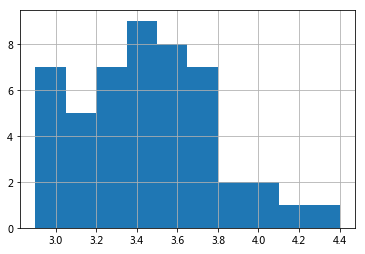

In [24]:
#drop 'iris-setosa' rows with a separal width < 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa','sepal_width_cm'].hist()

Excellent! Now all of our Iris-setosa rows have a sepal width greater than 2.5.

The next data issue to address is the several near-zero sepal lengths for the Iris-versicolor rows. Let's take a look at those rows.

In [25]:
iris_data.loc[(iris_data['class']=='Iris-versicolor')&
             (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


All of these near-zero `sepal_length_cm` entries seem to be off by two orders of magnitude, as if they had been recorded in meters instead of centimeters.

After some brief correspondence with the field researchers, we find that one of them forgot to convert those measurements to centimeters. Let's do that for them.

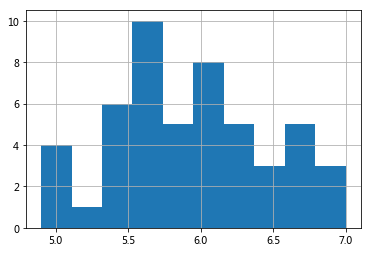

In [26]:
iris_data = iris_data.copy(deep=True)
iris_data.loc[(iris_data['class'] == 'Iris-versicolor')&
             (iris_data['sepal_length_cm'] < 1.0),
             'sepal_length_cm'] *= 100 
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

They could've really thrown our analysis off.

>We had to drop those rows with missing values.

In [29]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


It's not ideal that we had to drop those rows, especially considering they're all `Iris-setosa` entries. Since it seems like the missing data is systematic — all of the missing values are in the same column for the same *Iris* type — this error could potentially bias our analysis.

One way to deal with missing data is **mean imputation**: If we know that the values for a measurement fall in a certain range, we can fill in empty values with the average of that measurement.

Let's see if we can do that here.

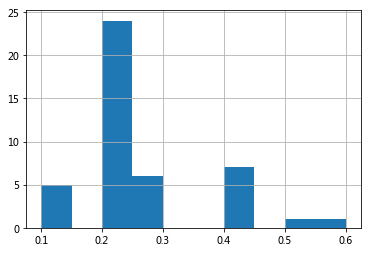

In [31]:
iris_data.loc[iris_data['class'] == 'Iris-setosa','petal_width_cm'].hist()

Most of the petal widths for `Iris-setosa` fall within the 0.2-0.3 range, so let's fill in these entries with the average measured petal width.

In [35]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa','petal_width_cm'].mean()
iris_data.loc[(iris_data['class'] == 'Iris-setosa')&
             (iris_data['petal_width_cm'].isnull()),
             'petal_width_cm'] = average_petal_width
iris_data.loc[(iris_data['class'] == 'Iris-setosa')&
             (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


Great! Now we've recovered those rows and no longer have missing data in our data set.

**Note:** If you don't feel comfortable imputing your data, you can drop all rows with missing data with the `dropna()` call:

    iris_data.dropna(inplace=True)

After all this hard work, we don't want to repeat this process every time we work with the data set. Let's save the tidied data file *as a separate file* and work directly with that data file from now on.

In [36]:
# iris_data.to_csv('iris-data-clean.csv',index = False)
iris_data_clean = pd.read_csv('/home/jakey/github/Data-Analysis-and-Machine-Learning-Projects/example-data-science-notebook/iris-data-clean.csv')

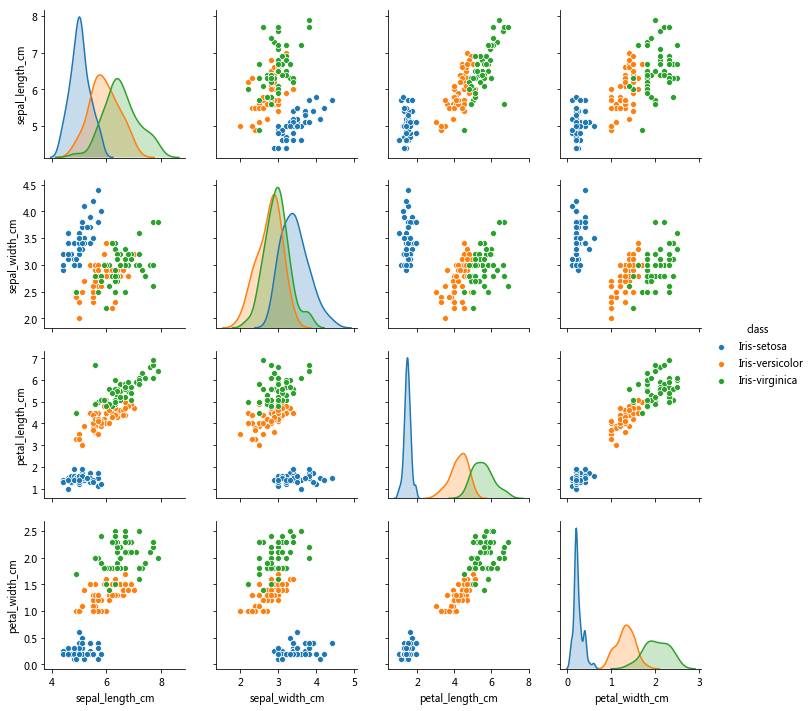

In [38]:
sns.pairplot(iris_data_clean,hue = 'class')

Of course, I purposely inserted numerous errors into this data set to demonstrate some of the many possible scenarios you may face while tidying your data.

The general takeaways here should be:

Make sure your data is encoded properly

Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range

Deal with missing data in one way or another: replace it if you can or drop it

Never tidy your data manually because that is not easily reproducible

Use code as a record of how you tidied your data

Plot everything you can about the data at this stage of the analysis so you can visually confirm everything looks correct

## Bonus: Testing our data

[[ go back to the top ]](#Table-of-contents)

At SciPy 2015, I was exposed to a great idea: We should test our data. Just how we use unit tests to verify our expectations from code, we can similarly set up unit tests to verify our expectations about a data set.

We can quickly test our data using `assert` statements: We assert that something must be true, and if it is, then nothing happens and the notebook continues running. However, if our assertion is wrong, then the notebook stops running and brings it to our attention. For example,

```Python
assert 1 == 2
```

will raise an `AssertionError` and stop execution of the notebook because the assertion failed.

Let's test a few things that we know about our data set now.

In [40]:
# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

In [44]:
# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[(iris_data_clean['class'] == 'Iris-versicolor'), 'sepal_length_cm'].min()>2.5 

In [50]:
# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isna()) |
                          (iris_data_clean['sepal_width_cm'].isna()) |
                          (iris_data_clean['petal_width_cm'].isna()) |
                          (iris_data_clean['petal_length_cm'].isna())]) == 0

## Step 4: Exploratory analysis
​
[[ go back to the top ]](#Table-of-contents)
​
Now after spending entirely too much time tidying our data, we can start analyzing it!
​
Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:
​
* How is my data distributed?
​
* Are there any correlations in my data?
​
* Are there any confounding factors that explain these correlations?
​
This is the stage where we plot all the data in as many ways as possible. Create many charts, but don't bother making them pretty — these charts are for internal use.
​
Let's return to that scatterplot matrix that we used earlier.

Our data is normally distributed for the most part, which is great news if we plan on using any modeling methods that assume the data is normally distributed.

There's something strange going on with the petal measurements. Maybe it's something to do with the different Iris types. Let's color code the data by the class again to see if that clears things up.

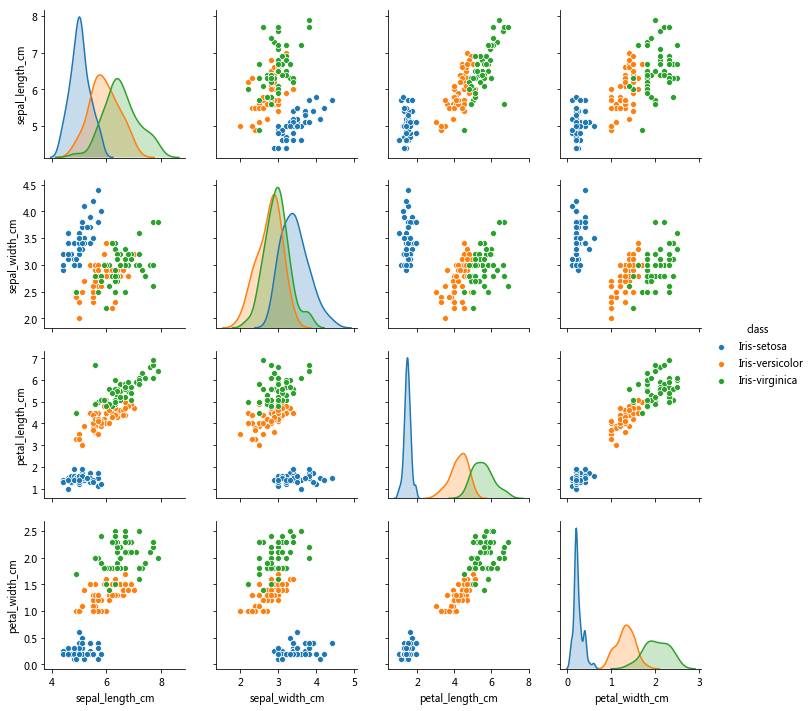

In [52]:
sns.pairplot(iris_data_clean,hue='class')

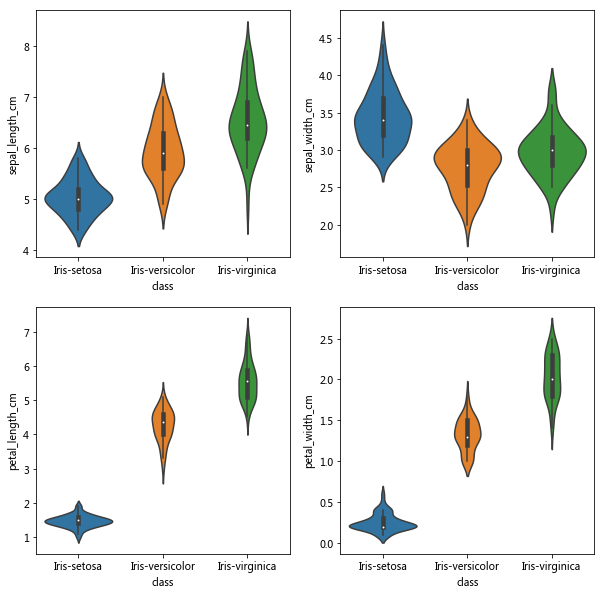

In [65]:
plt.figure(figsize = (10,10))
for column_index,column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2,2,column_index+1)
    sns.violinplot(x=iris_data_clean['class'],y=column,data = iris_data_clean)

## Step 5: Classification

[[ go back to the top ]](#Table-of-contents)

Wow, all this work and we *still* haven't modeled the data!

As tiresome as it can be, tidying and exploring our data is a vital component to any data analysis. If we had jumped straight to the modeling step, we would have created a faulty classification model.

Remember: **Bad data leads to bad models.** Always check your data first.

<hr />

Assured that our data is now as clean as we can make it — and armed with some cursory knowledge of the distributions and relationships in our data set — it's time to make the next big step in our analysis: Splitting the data into training and testing sets.

A **training set** is a random subset of the data that we use to train our models.

A **testing set** is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

Especially in sparse data sets like ours, it's easy for models to **overfit** the data: The model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the testing set.

Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: We cannot use any information from the testing set to build our model or else we're cheating.

Let's set up our data first.

In [70]:
iris_data_clean = pd.read_csv('/home/jakey/github/Data-Analysis-and-Machine-Learning-Projects/example-data-science-notebook/iris-data-clean.csv')
all_inputs = iris_data_clean.loc[:,('sepal_length_cm', 'sepal_width_cm',
                                    'petal_length_cm', 'petal_width_cm')].values
all_labels = iris_data_clean.loc[:,('class')].values
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [71]:
from sklearn.model_selection import train_test_split
train_inputs,test_inputs,train_class,test_class = train_test_split(all_inputs,all_labels,test_size=0.25,random_state=1)

With our data split, we can start fitting models to our data. Our company's Head of Data is all about decision tree classifiers, so let's start with one of those.

Decision tree classifiers are incredibly simple in theory. In their simplest form, decision tree classifiers ask a series of Yes/No questions about the data — each time getting closer to finding out the class of each entry — until they either classify the data set perfectly or simply can't differentiate a set of entries. Think of it like a game of [Twenty Questions](https://en.wikipedia.org/wiki/Twenty_Questions), except the computer is *much*, *much* better at it.

Here's an example decision tree classifier:

<img src="/home/jakey/github/Data-Analysis-and-Machine-Learning-Projects/example-data-science-notebook/images/iris_dtc.png" />

Notice how the classifier asks Yes/No questions about the data — whether a certain feature is <= 1.75, for example — so it can differentiate the records. This is the essence of every decision tree.

The nice part about decision tree classifiers is that they are **scale-invariant**, i.e., the scale of the features does not affect their performance, unlike many Machine Learning models. In other words, it doesn't matter if our features range from 0 to 1 or 0 to 1,000; decision tree classifiers will work with them just the same.

There are several [parameters](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) that we can tune for decision tree classifiers, but for now let's use a basic decision tree classifier.

In [74]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(train_inputs,train_class)
decision_tree_classifier.score(test_inputs,test_class)

0.9736842105263158

Heck yeah! Our model achieves 97% classification accuracy without much effort.

However, there's a catch: Depending on how our training and testing set was sampled, our model can achieve anywhere from 80% to 100% accuracy:

(array([  3.,   3.,  30.,   0.,  77., 208.,   0., 345., 257.,  77.]),
 array([0.81578947, 0.83421053, 0.85263158, 0.87105263, 0.88947368,
        0.90789474, 0.92631579, 0.94473684, 0.96315789, 0.98157895,
        1.        ]),
 <a list of 10 Patch objects>)

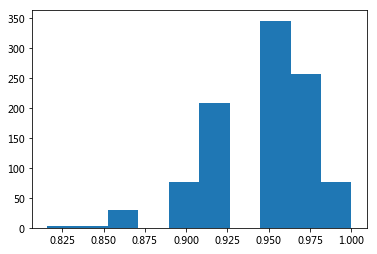

In [77]:
model_accuracies = []

for repetition in range(1000):
    train_inputs,test_inputs,train_class,test_class = train_test_split(all_inputs,all_labels,test_size=0.25)
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(train_inputs,train_class)
    classifier_accuracy = decision_tree_classifier.score(test_inputs,test_class)
    model_accuracies.append(classifier_accuracy)
plt.hist(model_accuracies)

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as **overfitting**: The model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before.

### Cross-validation

[[ go back to the top ]](#Table-of-contents)

This problem is the main reason that most data scientists perform ***k*-fold cross-validation** on their models: Split the original data set into *k* subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated *k* times such that each subset is used as the testing set exactly once.

10-fold cross-validation is the most common choice, so let's use that here. Performing 10-fold cross-validation on our data set looks something like this:

(each square is an entry in our data set)

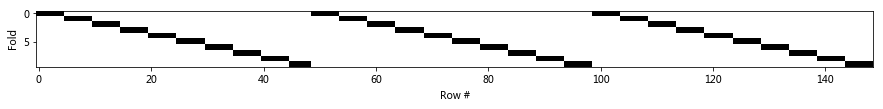

In [83]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    plt.figure(figsize=(15,15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

Text(0.5,1,'Average score:0.96')

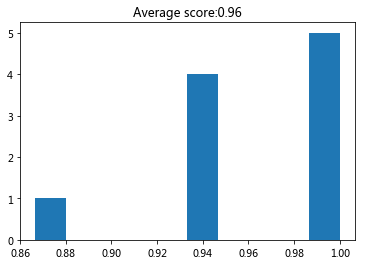

In [86]:
from sklearn.model_selection import cross_val_score
decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier,all_inputs,all_labels,cv=10)
plt.hist(cv_scores)
plt.title('Average score:{}'.format(np.mean(cv_scores)))

### Parameter tuning

[[ go back to the top ]](#Table-of-contents)

Every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier. For example, if we severely limit the depth of our decision tree classifier:

Text(0.5,1,'Average score: 0.6642857142857144')

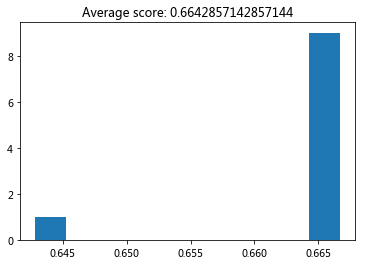

In [88]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

the classification accuracy falls tremendously.

Therefore, we need to find a systematic method to discover the best parameters for our model and data set.

The most common method for model parameter tuning is Grid Search. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

In [127]:
from sklearn.model_selection import GridSearchCV
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth':[1,2,3,4,5],
                 'max_features':[1,2,3,4]}

cross_vilidation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                          param_grid=parameter_grid,
                          cv=cross_vilidation)

grid_search.fit(all_inputs,all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9664429530201343
Best parameters: {'max_depth': 5, 'max_features': 2}


([<matplotlib.axis.YTick at 0x7f2aa9d28240>,
 <a list of 5 Text yticklabel objects>)

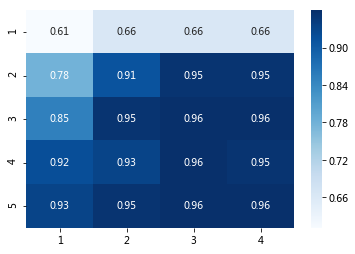

In [125]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization = grid_visualization.reshape(5,4)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
#locs:放置刻度的位置，labels:标签列表
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])

Now we have a better sense of the parameter space: We know that we need a `max_depth` of at least 2 to allow the decision tree to make more than a one-off decision.

`max_features` doesn't really seem to make a big difference here as long as we have 2 of them, which makes sense since our data set has only 4 features and is relatively easy to classify. (Remember, one of our data set's classes was easily separable from the rest based on a single feature.)

Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.

In [135]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}
cross_validation = StratifiedKFold(n_splits=10)
grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(all_inputs,all_labels)
print('Best scores: {}'.format(grid_search.best_score_))
print('Best paraments: {}'.format(grid_search.best_params_))

Best scores: 0.9664429530201343
Best paraments: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 3, 'splitter': 'best'}


In [137]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

We can even visualize the decision tree with GraphViz to see how it's making the classifications:

In [139]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

(This classifier may look familiar from earlier in the notebook.)

Alright! We finally have our demo classifier. Let's create some visuals of its performance so we have something to show our company's Head of Data.

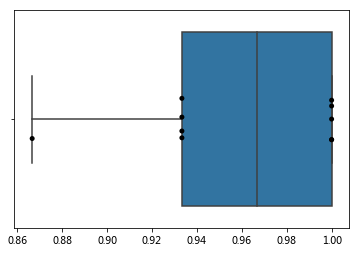

In [143]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black')

Hmmm... that's a little boring by itself though. How about we compare another classifier to see how they perform?

We already know from previous projects that Random Forest classifiers usually work better than individual decision trees. A common problem that decision trees face is that they're prone to overfitting: They complexify to the point that they classify the training set near-perfectly, but fail to generalize to data they have not seen before.

Random Forest classifiers work around that limitation by creating a whole bunch of decision trees (hence "forest") — each trained on random subsets of training samples (drawn with replacement) and features (drawn without replacement) — and have the decision trees work together to make a more accurate classification.

Let that be a lesson for us: Even in Machine Learning, we get better results when we work together!

Let's see if a Random Forest classifier works better here.

The great part about scikit-learn is that the training, testing, parameter tuning, etc. process is the same for all models, so we only need to plug in the new classifier.

In [148]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9664429530201343
Best parameters: {'criterion': 'gini', 'max_features': 2, 'n_estimators': 25}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Now we can compare their performance:

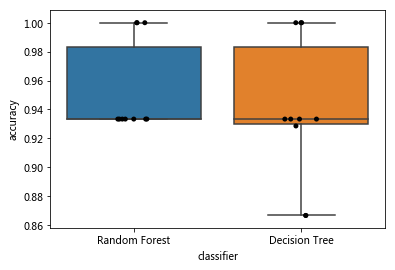

In [150]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sns.boxplot(x='classifier', y='accuracy', data=both_df)
sns.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')

How about that? They both seem to perform about the same on this data set. This is probably because of the limitations of our data set: We have only 4 features to make the classification, and Random Forest classifiers excel when there's hundreds of possible features to look at. In other words, there wasn't much room for improvement with this data set.

## Step 6: Reproducibility

[[ go back to the top ]](#Table-of-contents)

Ensuring that our work is reproducible is the last and — arguably — most important step in any analysis. **As a rule, we shouldn't place much weight on a discovery that can't be reproduced**. As such, if our analysis isn't reproducible, we might as well not have done it.

Notebooks like this one go a long way toward making our work reproducible. Since we documented every step as we moved along, we have a written record of what we did and why we did it — both in text and code.

Beyond recording what we did, we should also document what software and hardware we used to perform our analysis. This typically goes at the top of our notebooks so our readers know what tools to use.

[Sebastian Raschka](http://sebastianraschka.com/) created a handy [notebook tool](https://github.com/rasbt/watermark) for this:

In [151]:
%load_ext watermark

In [153]:
%watermark -a 'Barri' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Barri Wed Aug 08 2018 

CPython 3.6.5
IPython 6.4.0

numpy 1.14.5
pandas 0.23.3
sklearn 0.19.1
matplotlib 2.2.2
seaborn 0.9.0

compiler   : GCC 7.2.0
system     : Linux
release    : 4.15.0-29-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


[5.9 3.  4.2 1.5]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[5.  2.  3.5 1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[5.2 3.4 1.4 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.8 4.  1.2 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[6.3 2.9 5.6 1.8]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.4 2.9 4.3 1.3]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.2 2.8 4.8 1.8]	-->	Iris-virginica	(Actual: Iris-virginica)
[4.4 3.  1.3 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.6 2.8 4.9 2. ]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.9 3.1 5.1 2.3]	-->	Iris-virginica	(Actual: Iris-virginica)


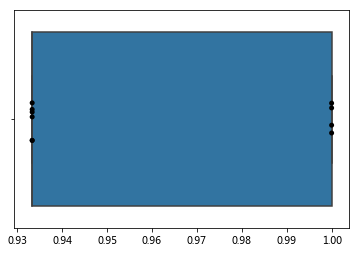

In [156]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('/home/jakey/github/Data-Analysis-and-Machine-Learning-Projects/example-data-science-notebook/iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_labels = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(criterion='gini', max_features=2, n_estimators=25)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='black')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))